In [1]:
!pip install pandas statsmodels seaborn


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd

# Manually enter the data
data = pd.DataFrame({
    'age': [25, 35, 45, 28, 34, 50, 29, 41, 31, 38],
    'smoking': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'exercise': ['Often', 'Rarely', 'Never', 'Often', 'Rarely', 'Never', 'Often', 'Rarely', 'Often', 'Rarely'],
    'disease': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

# View dataset
data


,age,smoking,exercise,disease
0,25,No,Often,No
1,35,Yes,Rarely,Yes
2,45,Yes,Never,Yes
3,28,No,Often,No
4,34,No,Rarely,No
5,50,Yes,Never,Yes
6,29,No,Often,No
7,41,Yes,Rarely,Yes
8,31,No,Often,No
9,38,Yes,Rarely,Yes


In [3]:
# Map binary target variable to 0/1
data['disease'] = data['disease'].map({'No': 0, 'Yes': 1})

# Convert 'smoking' and 'exercise' to dummy variables
data = pd.get_dummies(data, columns=['smoking', 'exercise'], drop_first=True)

# Show processed data
data


,age,disease,smoking_Yes,exercise_Often,exercise_Rarely
0,25,0,0,1,0
1,35,1,1,0,1
2,45,1,1,0,0
3,28,0,0,1,0
4,34,0,0,0,1
5,50,1,1,0,0
6,29,0,0,1,0
7,41,1,1,0,1
8,31,0,0,1,0
9,38,1,1,0,1


In [5]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load Data
data = pd.DataFrame({
    'age': [25, 35, 45, 28, 34, 50, 29, 41, 31, 38],
    'smoking': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes'],
    'exercise': ['Often', 'Rarely', 'Never', 'Often', 'Rarely', 'Never', 'Often', 'Rarely', 'Often', 'Rarely'],
    'disease': ['No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
})

# Step 2: Preprocess
data['disease'] = data['disease'].map({'No': 0, 'Yes': 1})
data_encoded = pd.get_dummies(data, columns=['smoking', 'exercise'], drop_first=True)

# Features and Target
X = data_encoded.drop('disease', axis=1)
y = data_encoded['disease']

# Step 3: Train logistic regression
clf = LogisticRegression()
clf.fit(X, y)

# Step 4: Predictions
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)[:, 1]  # probability of class 1 (disease)

# Step 5: Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

print("\nAccuracy: {:.2f}".format(accuracy_score(y, y_pred)))

# Step 6: Show predictions
data_encoded['predicted'] = y_pred
data_encoded['predicted_prob'] = y_prob
data_encoded[['disease', 'predicted', 'predicted_prob']]


Confusion Matrix:
[[5 0]
 [0 5]]

Accuracy: 1.00


,disease,predicted,predicted_prob
0,0,0,0.000391
1,1,1,0.644196
2,1,1,0.999787
3,0,0,0.004191
4,0,0,0.352611
5,1,1,0.999996
6,0,0,0.009201
7,1,1,0.995241
8,0,0,0.043269
9,1,1,0.951119


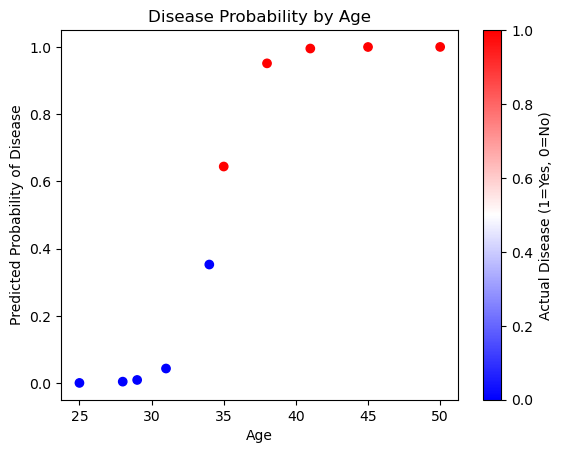

In [6]:
import matplotlib.pyplot as plt

plt.scatter(data_encoded['age'], data_encoded['predicted_prob'], c=y, cmap='bwr')
plt.xlabel("Age")
plt.ylabel("Predicted Probability of Disease")
plt.title("Disease Probability by Age")
plt.colorbar(label="Actual Disease (1=Yes, 0=No)")
plt.show()
